**STEP1:** Taking Input Image and Mapping It's Graylevel Intensity IN 8X8 Matrix

Enter the path to the image: /content/sample_data/Fig0323(a)(mars_moon_phobos).tif


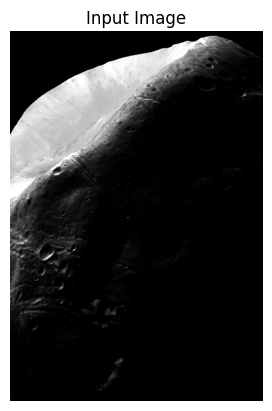

Pixel values stored in the array (image_array):
[[  0   0   0   0 226 255  41   5]
 [  0 228 219 202  47   0   0   0]
 [197 191 159  17   0   0   0   0]
 [138   1  23   0   1   0   0   0]
 [103  27   0   0   0   2   0   0]
 [ 12   0   0   5   0   0   0   0]
 [  1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


In [ ]:

from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to store pixel values in an array and display the input image using matplotlib
def store_and_display_image(image_path):
    # Read the image from file
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 8x8
    resized_image = cv2.resize(image, (8, 8))

    # Store the pixel values in the array
    image_array = np.array(resized_image)

    # Display the input image using Matplotlib
    plt.imshow(image, cmap='gray')
    plt.title("Input Image")
    plt.axis('off')  # Turn off axis
    plt.show()

    return image_array

# Prompt the user to input the image path
image_path = input("Enter the path to the image: ")

# Store pixel values in the array and display the input image using Matplotlib
image_array = store_and_display_image(image_path)

# Display the array
print("Pixel values stored in the array (image_array):")
print(image_array)



**Step2: Creating Sharpening Kernel**


3x3 Array of Mask:
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


Text(0.5, 1.0, 'Convolution Kernel')

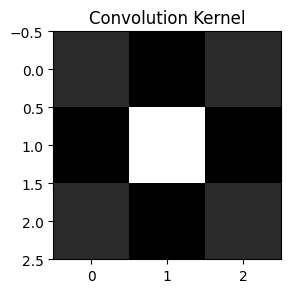

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

kernal_mask   = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
print("\n3x3 Array of Mask:")
print(kernal_mask)
plt.figure(figsize=(10, 5))

# plt.subplot(1, 3, 1)
# plt.imshow(image, cmap='gray')
# plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(kernal_mask, cmap='gray')
plt.title('Convolution Kernel')

**Step3:Padding zeros for Convolution**

In [ ]:
array1 = np.pad(image_array, ((1, 1), (1, 1)), mode='constant', constant_values=0)
print(array1)

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 226 255  41   5   0]
 [  0   0 228 219 202  47   0   0   0   0]
 [  0 197 191 159  17   0   0   0   0   0]
 [  0 138   1  23   0   1   0   0   0   0]
 [  0 103  27   0   0   0   2   0   0   0]
 [  0  12   0   0   5   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


**[Step4:Creating blank Array of 8x8 ]**

In [ ]:
import numpy as np

# Create an empty 8x8 array
empty_array = np.zeros((8, 8), dtype=int)

print("Empty 8x8 array:")
print(empty_array)

Empty 8x8 array:
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]




```

```

**Step5:Performing Convolution i.e Taking Kernal Mask Mapping it to every index of Image Matrix performing element wise multiplication and adding all values to signgle value and storing in blank 8x8 array.**

In [ ]:
import numpy as np



# Perform element-wise multiplication and summing for each index of array1
for i in range(1, 9):
    for j in range(1, 9):
        sub_array = array1[i-1:i+2, j-1:j+2]  # Extract the 3x3 sub-array centered at (i, j)
        result = np.sum(sub_array * kernal_mask)
        empty_array[i-1, j-1] = result

# Store the values of empty_array to Final_array
Final_array = empty_array.copy()

# Print the Final_array
print("Final 8x8 array:")
print(Final_array)



Final 8x8 array:
[[   0 -228 -219 -428  828 1008  -55  -16]
 [-425  730  506  727 -193 -302  -41   -5]
 [ 656  370  345 -276  -65    0    0    0]
 [ 389 -374  -45  -41    5   -3    0    0]
 [ 338   31  -50   -5   -3   10   -2    0]
 [ -44  -39   -5   25   -5   -2    0    0]
 [  -7   -1    0   -5    0    0    0    0]
 [  -1    0    0    0    0    0    0    0]]


In [ ]:
# # Perform element-wise multiplication and summing for each index of array1
# for i in range(8):
#     for j in range(8):
#         if i <= 3 and j <= 3:  # Make sure 3x3 ones array fits completely within array1
#             sub_array = array1[i:i+3, j:j+3]
#             result = np.sum(sub_array * kernal_mask)
#             empty_array[i, j] = result

# print("Resulting 8x8 array:")
# print(empty_array)
# Perform element-wise multiplication and summing for each index of array1
for i in range(1, 9):
    for j in range(1, 9):
        sub_array = array1[i-1:i+2, j-1:j+2]  # Extract the 3x3 sub-array centered at (i, j)
        result = np.sum(sub_array * kernal_mask)
        empty_array[i-1, j-1] = result

print("Resulting 8x8 array:")
print(empty_array)



Resulting 8x8 array:
[[   0 -228 -219 -428  828 1008  -55  -16]
 [-425  730  506  727 -193 -302  -41   -5]
 [ 656  370  345 -276  -65    0    0    0]
 [ 389 -374  -45  -41    5   -3    0    0]
 [ 338   31  -50   -5   -3   10   -2    0]
 [ -44  -39   -5   25   -5   -2    0    0]
 [  -7   -1    0   -5    0    0    0    0]
 [  -1    0    0    0    0    0    0    0]]


Step 6: Image convolution by using Standard Method

Enter the path of the image: /content/sample_data/Fig0323(a)(mars_moon_phobos).tif


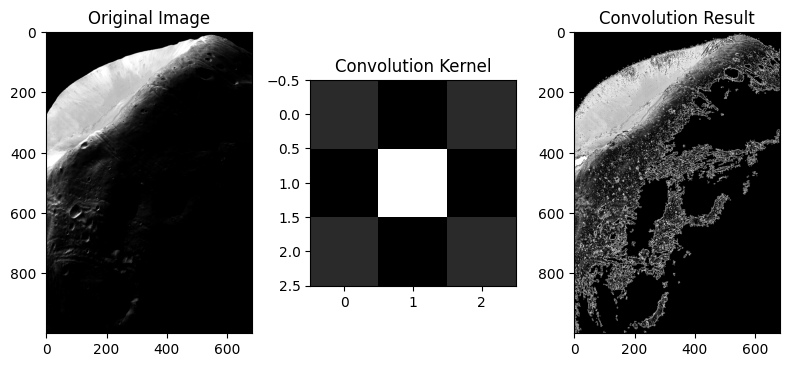

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function for performing convolution
def convolution(image, kernel):
    # Get image and kernel dimensions
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate padding for boundary handling
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Create a padded image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Create an empty result image
    result_image = np.zeros_like(image)

    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest (ROI) from the padded image
            roi = padded_image[i:i + kernel_height, j:j + kernel_width]

            # Perform element-wise multiplication and summation
            result_image[i, j] = np.sum(roi * kernel)

    return result_image

# Get user input for the image path
image_path = input("Enter the path of the image: ")

# Load the image from the specified path using Matplotlib
image = plt.imread(image_path)



#  3x3 kernel (sharpening filter)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Perform convolution
result = convolution(image, kernel)

# Display the results
plt.figure(figsize=(8, 8))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(kernel, cmap='gray')
plt.title('Convolution Kernel')

plt.subplot(1, 3, 3)
plt.imshow(result, cmap='gray')
plt.title('Convolution Result')

plt.tight_layout()
plt.show()

Enter the path of the image: /content/Fig0323(a)(mars_moon_phobos).tif


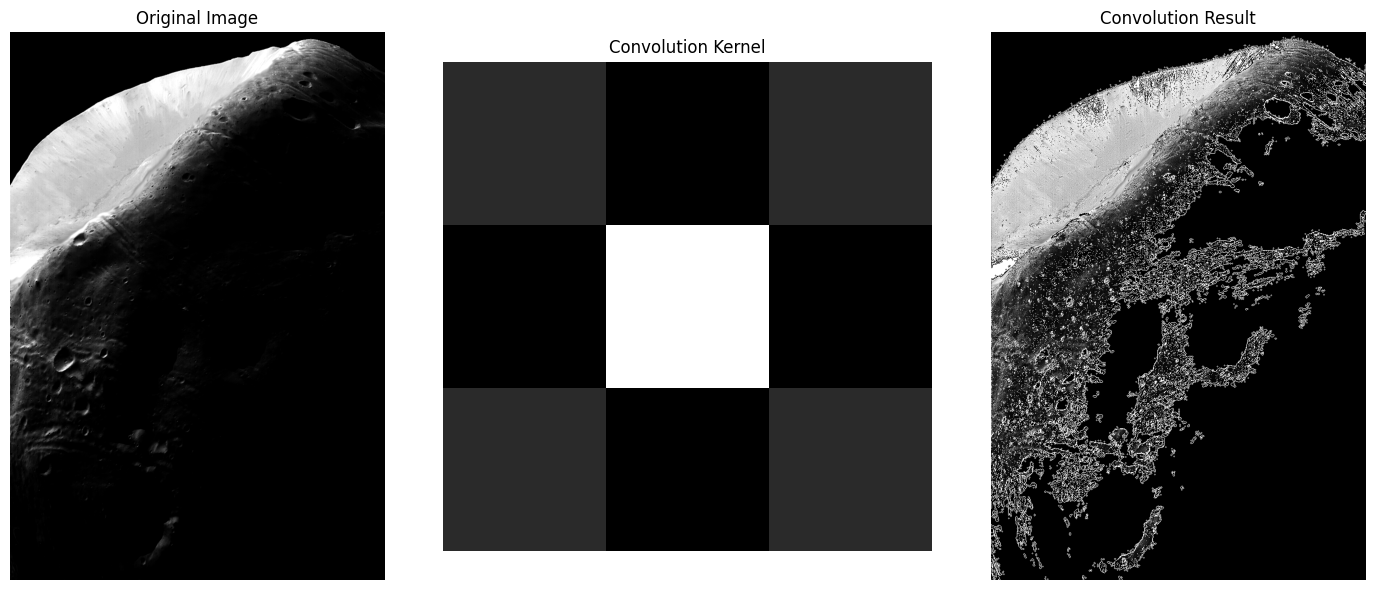

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Get user input for the image path
image_path = input("Enter the path of the image: ")

# Load the image from the specified path using Matplotlib
image = plt.imread(image_path)

# Define the convolution kernel (3x3 sharpening filter)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Get image dimensions
image_height, image_width = image.shape[:2]

# Get kernel dimensions
kernel_height, kernel_width = kernel.shape

# Calculate padding for boundary handling
pad_height = kernel_height // 2
pad_width = kernel_width // 2

# Create a padded image
padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

# Create an empty result image
result_image = np.zeros_like(image)

# Perform convolution
for i in range(image_height):
    for j in range(image_width):
        # Extract the region of interest (ROI) from the padded image
        roi = padded_image[i:i + kernel_height, j:j + kernel_width]

        # Perform element-wise multiplication and summation
        result_image[i, j] = np.sum(roi * kernel)

# Display the results
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(kernel, cmap='gray', interpolation='none') # Added interpolation='none'
plt.title('Convolution Kernel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result_image, cmap='gray')
plt.title('Convolution Result')
plt.axis('off')

plt.tight_layout()
plt.show()


Enter the path of the image: /content/Fig0323(a)(mars_moon_phobos).tif


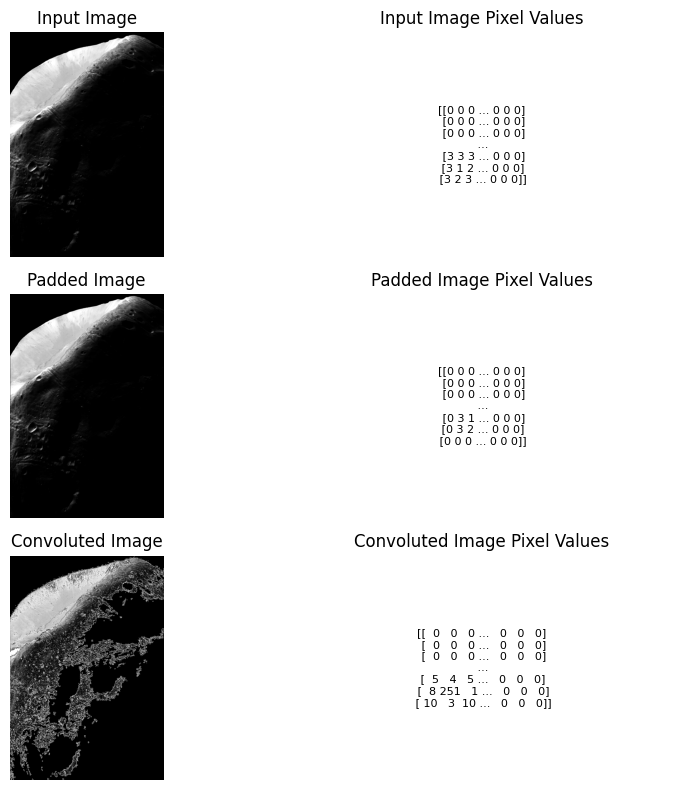

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function for performing convolution
def convolution(image, kernel):
    # Get image and kernel dimensions
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate padding for boundary handling
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Create a padded image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Create an empty result image
    result_image = np.zeros_like(image)

    # Create a list to store pixel value matrices
    pixel_value_matrices = []

    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest (ROI) from the padded image
            roi = padded_image[i:i + kernel_height, j:j + kernel_width]

            # Store the pixel value matrix of the ROI
            pixel_value_matrices.append(roi)

            # Perform element-wise multiplication and summation
            result_image[i, j] = np.sum(roi * kernel)

    return result_image, pixel_value_matrices

# Get user input for the image path
image_path = input("Enter the path of the image: ")

# Load the image from the specified path using Matplotlib
image = plt.imread(image_path)

# Define the convolution kernel (3x3 sharpening filter)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Perform convolution
result_image, pixel_value_matrices = convolution(image, kernel)

# Display the input image and its pixel value matrix
plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.text(0.5, 0.5, str(image), {'fontsize': 8}, ha='center', va='center')
plt.title('Input Image Pixel Values')
plt.axis('off')

# Display the padded image and its pixel value matrix
padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant')
plt.subplot(3, 3, 4)
plt.imshow(padded_image, cmap='gray')
plt.title('Padded Image')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.text(0.5, 0.5, str(padded_image), {'fontsize': 8}, ha='center', va='center')
plt.title('Padded Image Pixel Values')
plt.axis('off')

# Display the convoluted image and its pixel value matrix
plt.subplot(3, 3, 7)
plt.imshow(result_image, cmap='gray')
plt.title('Convoluted Image')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.text(0.5, 0.5, str(result_image), {'fontsize': 8}, ha='center', va='center')
plt.title('Convoluted Image Pixel Values')
plt.axis('off')

plt.tight_layout()
plt.show()


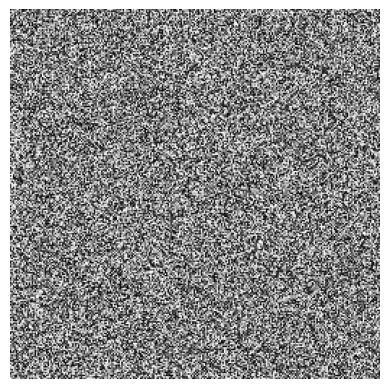

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Example pixel values matrix of an image
empty_array = np.random.randint(0, 256, size=(256, 256), dtype=np.uint8)

# Display the image using Matplotlib
plt.imshow(empty_array, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()
